# DataScience Project ´17

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import Imputer
#from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute
import math
from sklearn.feature_selection import VarianceThreshold
#import xgboost as xgb
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel
from scipy.stats import boxcox
from sklearn.cross_decomposition import PLSRegression
from sklearn.cluster import KMeans

%matplotlib inline

import numpy as np
from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.linear_model import LinearRegression
from scipy.spatial.distance import sqeuclidean
from scipy.optimize import linprog
#from cvxopt import matrix, solvers
import warnings
warnings.filterwarnings('ignore')

# Preprocessing

In [24]:
# sns.barplot(train.SalePrice)
#train.SalePrice.groupby(train.PoolArea).mean()
#dataspace.columns(dtypes==type(object)])
#dataspace=pd.concat([train, test], keys=['train', 'test'])
#nonnumeric=dataspace.loc[:,dataspace.dtypes==type(object)]
#missing_values = pd.concat([nonnumeric.isnull().sum()/len(train), test.isnull().sum()/len(test)], axis=1, keys=['Train', 'Test'])
#missing_values[missing_values.sum(axis=1)>0.5]


In [25]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
y = train.pop('SalePrice')
variables = pd.concat([train, test], keys=['train', 'test'])

Neighborhood
Blmngtn    194870
Blueste    137500
BrDale     104493
BrkSide    124834
ClearCr    212565
CollgCr    197965
Crawfor    210624
Edwards    128219
Gilbert    192854
IDOTRR     100123
MeadowV     98576
Mitchel    156270
NAmes      145847
NPkVill    142694
NWAmes     189050
NoRidge    335295
NridgHt    316270
OldTown    128225
SWISU      142591
Sawyer     136793
SawyerW    186555
Somerst    225379
StoneBr    310499
Timber     242247
Veenker    238772
Name: SalePrice, dtype: int64
Neighborhood
Blmngtn     17
Blueste      2
BrDale      16
BrkSide     58
ClearCr     28
CollgCr    150
Crawfor     51
Edwards    100
Gilbert     79
IDOTRR      37
MeadowV     17
Mitchel     49
NAmes      225
NPkVill      9
NWAmes      73
NoRidge     41
NridgHt     77
OldTown    113
SWISU       25
Sawyer      74
SawyerW     59
Somerst     86
StoneBr     25
Timber      38
Veenker     11
Name: SalePrice, dtype: int64


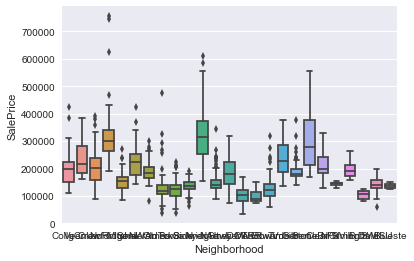

In [26]:
sns.boxplot(y=y,x=train.Neighborhood)
print((y).groupby(train.Neighborhood).mean())
print((y).groupby(train.Neighborhood).count())

In [55]:
def ClusterMap(classmeans, nclust=3):
    cluster=KMeans(n_clusters=nclust)
    fitcluster=cluster.fit(classmeans.reshape(-1,1))
    pred=fitcluster.predict(classmeans.reshape(-1,1))
    neighborhood_map = classmeans
    for i in range(0, len(pred)):
        neighborhood_map[i] = pred[i]
    return(neighborhood_map)

In [56]:
classmeans=(y).groupby(train.Neighborhood).mean()
neighborhood_map = ClusterMap(classmeans)
train["Neighborhood"].map(neighborhood_map)

0       2
1       2
2       2
3       2
4       1
5       0
6       2
7       2
8       0
9       0
10      0
11      1
12      0
13      2
14      0
15      0
16      0
17      0
18      2
19      0
20      1
21      0
22      2
23      0
24      0
25      1
26      0
27      1
28      0
29      0
       ..
1430    2
1431    0
1432    0
1433    2
1434    0
1435    0
1436    0
1437    1
1438    0
1439    2
1440    2
1441    2
1442    2
1443    0
1444    2
1445    0
1446    0
1447    2
1448    0
1449    0
1450    0
1451    2
1452    0
1453    0
1454    2
1455    2
1456    2
1457    2
1458    0
1459    0
Name: Neighborhood, dtype: int64

Neighborhood
0    204322
1    134239
2    320716
Name: SalePrice, dtype: int64
Neighborhood
0    592
1    725
2    143
Name: SalePrice, dtype: int64


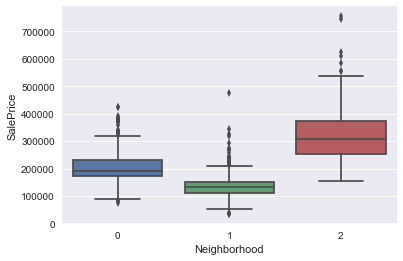

In [45]:
train.Neighborhood=train.Neighborhood.map(neighborhood_map)
test.Neighborhood=test.Neighborhood.map(neighborhood_map)
sns.boxplot(y=y,x=train.Neighborhood)
print((y).groupby(train.Neighborhood).mean())
print((y).groupby(train.Neighborhood).count())

In [22]:
print(variables.columns)
#print(y.groupby(train.MoSold).mean())
#sns.distplot((variables.GrLivArea))
#print((y/train.GrLivArea).groupby(train.OverallQual).mean())
print((y).groupby(train.OverallQual).mean())
sns.boxplot(y=y,x=train.OverallQual)
#sns.boxplot(np.log(y))

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'GrLivArea', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=255)


AttributeError: 'numpy.ndarray' object has no attribute 'groupby'

In [9]:
# Some ideas are from kaggle forum
variables['MSSubClass'] = variables['MSSubClass'].astype(str)
variables['Alley'] = variables['Alley'].fillna('NoAlley')
variables.OverallCond = variables.OverallCond.astype(str)
variables['TotalBsmtSF'] = variables['TotalBsmtSF'].fillna(0)
variables['KitchenAbvGr'] = variables['KitchenAbvGr'].astype(str)
variables['FireplaceQu'] = variables['FireplaceQu'].fillna('NoFP')
variables['GarageCars'] = variables['GarageCars'].fillna(0.0)
variables.YrSold[variables['YrSold']<=2007]='older2007'
variables.YrSold[variables['YrSold']!='older2007']='newer2007'
variables['YrSold'] = variables['YrSold'].astype(str)
#variables['MoSold'] = variables['MoSold'].astype(str)
variables.drop(('MoSold'),axis=1,inplace=True)
variables['HouseAge']=variables.YearBuilt.max()-variables.YearBuilt
variables.drop(('YearBuilt'),axis=1,inplace=True)
variables['RemodAge']=variables.YearRemodAdd.max()-variables.YearRemodAdd
variables.drop(('YearRemodAdd'),axis=1,inplace=True)
#variables['NumberFloors'] = (variables['2ndFlrSF']>0).astype(int)
variables['PoolAvail'] = (variables['PoolArea']>0).astype(int)
variables.drop(('PoolArea'),axis=1,inplace=True)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    variables[col] = variables[col].fillna('NoBSMT')

# GarageType, GarageFinish, GarageQual  NA in all. NA means No Garage
for col in ('GarageType', 'GarageFinish', 'GarageQual'):
    variables[col] = variables[col].fillna('NoGRG')


# Adding total sqfootage feature and removing Basement, 1st and 2nd floor variables
variables['TotalSF'] = variables['TotalBsmtSF'] + variables['1stFlrSF'] + variables['2ndFlrSF']
variables.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)

In [10]:
variables.drop(['Utilities', 'RoofMatl', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF',
               'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'GarageYrBlt', 'GarageArea', 'GarageCond', 'WoodDeckSF',
               'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal'],
              axis=1, inplace=True)

In [11]:
variables.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'GrLivArea', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'PavedDrive', 'YrSold',
       'SaleType', 'SaleCondition', 'HouseAge', 'RemodAge', 'PoolAvail',
       'TotalSF'],
      dtype='object')

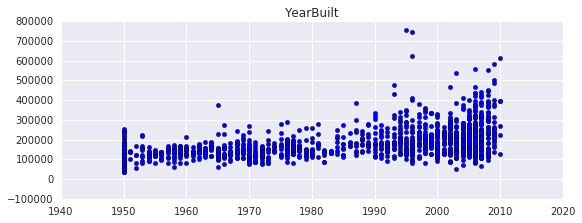

In [6]:
fig = plt.figure(2, figsize=(9, 7))
plt.subplot(211)
plt.scatter(train.YearRemodAdd.values, y)
plt.title('YearBuilt')

In [12]:
variables['MSZoning'] = variables['MSZoning'].fillna(variables['MSZoning'].mode()[0])
variables['LotFrontage'] = variables['LotFrontage'].fillna(variables['LotFrontage'].median())
variables['MasVnrType'] = variables['MasVnrType'].fillna(variables['MasVnrType'].mode()[0])
variables['Electrical'] = variables['Electrical'].fillna(variables['Electrical'].mode()[0])
variables['KitchenQual'] = variables['KitchenQual'].fillna(variables['KitchenQual'].mode()[0])
variables['SaleType'] = variables['SaleType'].fillna(variables['SaleType'].mode()[0])

In [13]:
numeric_variables = variables.loc[:,['LotFrontage', 'LotArea', 'GrLivArea', 'TotalSF','HouseAge','RemodAge','TotRmsAbvGrd']]
numeric_variables = np.log(numeric_variables)
#numeric_variables = pd.concat([numeric_variables,variables.loc[:,['BedroomAbvGr','TotRmsAbvGrd']]],axis=1)
numeric_variables_standardized = (numeric_variables - numeric_variables.loc['train'].mean())/numeric_variables.loc['train'].std()

In [14]:

conditions = set([x for x in variables['Condition1']] + [x for x in variables['Condition2']])
dummies = pd.DataFrame(data=np.zeros((len(variables.index), len(conditions))),
                       index=variables.index, columns=conditions)
for i, cond in enumerate(zip(variables['Condition1'], variables['Condition2'])):
    dummies.ix[i, cond] = 1
variables = pd.concat([variables, dummies.add_prefix('Condition_')], axis=1)
variables.drop(['Condition1', 'Condition2'], axis=1, inplace=True)

# Getting Dummies from Exterior1st and Exterior2nd
exteriors = set([x for x in variables['Exterior1st']] + [x for x in variables['Exterior2nd']])
dummies = pd.DataFrame(data=np.zeros((len(variables.index), len(exteriors))),
                       index=variables.index, columns=exteriors)
for i, ext in enumerate(zip(variables['Exterior1st'], variables['Exterior2nd'])):
    dummies.ix[i, ext] = 1
variables = pd.concat([variables, dummies.add_prefix('Exterior_')], axis=1)
variables.drop(['Exterior1st', 'Exterior2nd', 'Exterior_nan'], axis=1, inplace=True)

# Getting Dummies from all other categorical vars
for col in variables.dtypes[variables.dtypes == 'object'].index:
    for_dummy = variables.pop(col)
    variables = pd.concat([variables, pd.get_dummies(for_dummy, prefix=col)], axis=1)

In [15]:
### Copying features
variables_standardized = variables.copy()

### Replacing numeric features by standardized values
variables_standardized.update(numeric_variables_standardized)

In [16]:
### Splitting features
train_variables = variables.loc['train'].drop('Id', axis=1).select_dtypes(include=[np.number]).values
test_variables = variables.loc['test'].drop('Id', axis=1).select_dtypes(include=[np.number]).values

### Splitting standardized features
y = y.values
x = variables_standardized.loc['train'].drop('Id', axis=1).select_dtypes(include=[np.number]).values
final_set = variables_standardized.loc['test'].drop('Id', axis=1).select_dtypes(include=[np.number]).values

# Defining Modelvalidation function

In [17]:
def Modelvalidation(model,x,y,splitsize=0.3,takelog=True,iterations=10):
    repeated_rmsle=np.zeros(iterations)
    for j in range(iterations):
        rmsle=0
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=splitsize)
        if takelog==True:
            y_train=np.log(y_train)
        regressionfit=model.fit(x_train,y_train)
        if takelog==True:
            prediction=np.exp(regressionfit.predict(x_test))
        if takelog==False:
            prediction=regressionfit.predict(x_test)
        for i in range(len(y_test)):
            if(prediction[i]<=0):
                prediction[i]=np.mean(y_train)
            rmsle += (math.log(y_test[i]+1) - math.log(prediction[i]+1))**2
        rmsle=(rmsle/len(y_test))**0.5
        repeated_rmsle[j]=rmsle
    return(repeated_rmsle)

In [18]:
def Two_Modelvalidation(model1,model2,x,y,splitsize=0.3,takelog=True,iterations=10,model1imp=0.5):
    repeated_rmsle=np.zeros(iterations)
    for j in range(iterations):
        rmsle=0
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=splitsize)
        if takelog==True:
            y_train=np.log(y_train)
        regressionfit_model1=model1.fit(x_train,y_train)
        regressionfit_model2=model2.fit(x_train,y_train)
        if takelog==True:
            prediction_model1=np.exp(regressionfit_model1.predict(x_test))
            prediction_model2=np.exp(regressionfit_model2.predict(x_test))
        if takelog==False:
            prediction_model1=regressionfit_model1.predict(x_test)
            prediction_model2=regressionfit_model2.predict(x_test)
        for i in range(len(y_test)):
            if(prediction_model1[i]<=0):
                prediction_model1[i]=np.mean(y_train)
            if(prediction_model2[i]<=0):
                prediction_model2[i]=np.mean(y_train)
            prediction = model1imp*prediction_model1 + (1-model1imp)*prediction_model2
            rmsle += (math.log(y_test[i]+1) - math.log(prediction[i]+1))**2
        rmsle=(rmsle/len(y_test))**0.5
        repeated_rmsle[j]=rmsle
    return(repeated_rmsle)

# Ridge Regression and finding optimal tuning parameter

0.126031588619


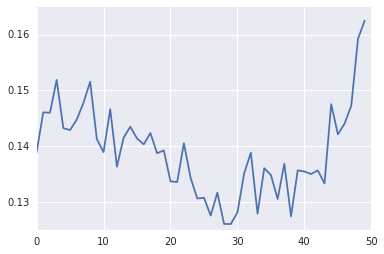

In [20]:
parameter=np.logspace(-2,3,50)
results=np.zeros(len(parameter))
for i in range(len(parameter)):
    results[i]=Modelvalidation(linear_model.Ridge(alpha=parameter[i]),x,y).mean()
plt.plot(results)
print(results.min())

Optimal alpha should be around 30 with an error around 0.13

# Lasso Regression and finding optimal tuning parameter

0.153308879453


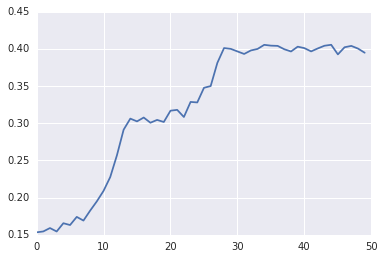

In [39]:
parameter=np.logspace(-2,3,50)
results=np.zeros(len(parameter))
for i in range(len(parameter)):
    results[i]=Modelvalidation(linear_model.Lasso(alpha=parameter[i]),x,y).mean()
plt.plot(results)   
print(results.min())

# Bayesian Ridge Regression

In [21]:
Modelvalidation(linear_model.BayesianRidge(),x,y).mean()

0.12716748504910519

# Partial Least Squares

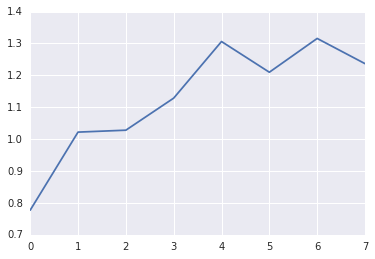

In [56]:
parameter=np.arange(2,10,1)
results=np.zeros(len(parameter))
for i in range(len(parameter)):
    results[i]=Modelvalidation(PLSRegression(n_components=parameter[i])
        ,x,y).mean()
plt.plot(results) 

# Elastic Net Model

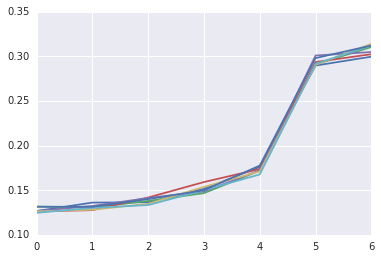

In [57]:
parameter=np.logspace(-2,0,7)
parameter2=np.logspace(-2,0,7)
results=np.ndarray(shape=(len(parameter),len(parameter2)))
for i in range(len(parameter)):
    for j in range(len(parameter2)):
        results[i,j]=Modelvalidation(linear_model.ElasticNet(max_iter=3000,l1_ratio=parameter[i],alpha=parameter2[i]),x,y).mean()
plt.plot(results)    
print(results.min())

# Gradient Boosting

0.125770547526


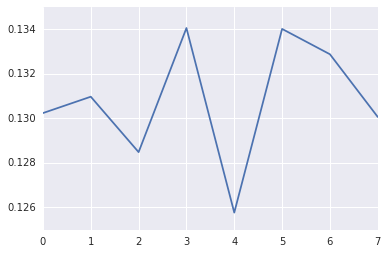

In [60]:
parameter=np.arange(2,10,1)
results=np.zeros(len(parameter))
for i in range(len(parameter)):
    results[i]=Modelvalidation(GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=parameter[i], max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber')
        ,x,y,iterations=5).mean()
plt.plot(results)
print(results.min())

# RandomForest

In [17]:
parameter=np.arange(100,300,2)
results=np.zeros(len(parameter))
for i in range(len(parameter)):
    results[i]=Modelvalidation(RandomForestRegressor(n_estimators=parameter[i])
        ,x,y,iterations=1).mean() 
plt.plot(results)   
print(results.min())

SyntaxError: invalid syntax (<ipython-input-17-206787eda419>, line 5)

# Extreme Gradient Boosting

0.12142451609


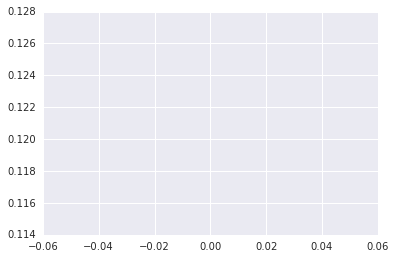

In [20]:
parameter=np.arange(2,3,1)
results=np.zeros(len(parameter))
for i in range(len(parameter)):
    results[i]=Modelvalidation(xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, learning_rate=0.05, max_depth=6,
                               min_child_weight=1.5, n_estimators=7200, reg_alpha=0.9, reg_lambda=0.6,subsample=0.2)
        ,x,y,iterations=1).mean()
plt.plot(results)  
print(results.min())

# Delauny Network

In [20]:
# by Nils Löhndorf
from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.linear_model import LinearRegression
from scipy.spatial.distance import euclidean
from scipy.optimize import linprog
from cvxopt import matrix, solvers
from sklearn.preprocessing import StandardScaler
class DelaunayRegressor(object):
    
    _points = None
    _n_points = None
    _dim = None
    _coef = None
    _scaling = None
    
    def __init__(self, n_points=None, scaling=False):
        self._n_points = n_points
        self._scaling = scaling
    
    def fit(self, X, y):
        y = np.array(y)
        X = np.array(X)
        if self._n_points is None:
            kmeans = AffinityPropagation()
        else:
            kmeans = KMeans(n_clusters=self._n_points)
        if self._scaling:
            reg = LinearRegression()
            reg.fit(X,y)
            self._coef = reg.coef_
            X = X*self._coef
        else:
            self._scaler = StandardScaler()
            X = self._scaler.fit_transform(X)
        kmeans.fit(X)
        self._points = kmeans.cluster_centers_
        self._n_points, self._dim = self._points.shape
        weights = np.empty((X.shape[0],self._n_points))
        for i in range(len(X)):
            weights[i] = self.get_weights_qp(X[i])[1]
        reg = LinearRegression(fit_intercept=False)
        reg.fit(weights,y)
        self._means = reg.coef_

    def score(self, X, y):
        y = np.array(y)
        X = np.array(X)
        self._in_hull = 0
        rss = 0.
        if self._scaling:
            X = X*self._coef
        else:
            X = self._scaler.transform(X)
        y = np.array(y)
        for i in range(len(X)):
            error, weights = self.get_weights_qp(X[i])
            if error == 0:
                self._in_hull += 1
            rss += (weights.dot(self._means)-y[i])**2
        tss = ((y-y.mean())**2).sum()
        return (1-rss/tss)
    
    def predict(self, X):
        X = np.array(X)
        self._in_hull = 0
        if self._scaling:
            X = X*self._coef
        else:
            X = self._scaler.transform(X)
        if len(self._means.shape)==1:
            y_hat = np.zeros(X.shape[0])
        if len(self._means.shape)==2:
            y_hat = np.zeros((X.shape[0], self._means.shape[1]))
        for i in range(len(X)):
            error, weights = self.get_weights_qp(X[i])
            if error == 0:
                self._in_hull += 1
            y_hat[i] = weights.dot(self._means)
        return y_hat
    
    def get_weights_lp(self, point):
        points = self._points
        n_points = self._n_points
        c = np.array([euclidean(points[i], point) for i in range(n_points)])
        A = np.r_[points.T,np.ones((1,n_points))]
        b = np.r_[point, np.ones(1)]
        lp = linprog(c, A_eq=A, b_eq=b)
        return lp.success, lp.x
        
    def get_weights_qp(self, point):
        points = self._points
        n_points, dim = points.shape
        P = matrix(sum(np.outer(points.T[i],points.T[i]) for i in range(dim)))
        q = matrix(sum(-points.T[i]*point[i] for i in range(dim)))
        G = matrix(-np.identity(n_points))
        h = matrix(np.zeros(n_points))
        A = matrix(np.ones((1,n_points)))
        b = matrix(np.ones(1))
        sol = solvers.qp(P, q, G, h, A, b, options={"show_progress":False})
        weights = np.array([sol["x"][i] for i in range(n_points)])
        error = (((self._points.T).dot(weights)-point)**2).sum()
        if error < 1.e-7:
            success, weights_lp = self.get_weights_lp(point)
            if success:
                return 0.0, weights_lp
        return error, weights

In [15]:
parameter=np.arange(100,300,2)
results=np.zeros(len(parameter))
delaun=DelaunayRegressor(n_points=300)
for i in range(len(parameter)):
    results[i]=Modelvalidation(delaun
        ,x,y,iterations=2).mean()
plt.plot(results)    

AttributeError: 'NoneType' object has no attribute 'predict'

In [21]:
a=(delaun.fit(x,y))

In [ ]:
b=delaun.score(x,y)

# SVM Regression

0.201649044641


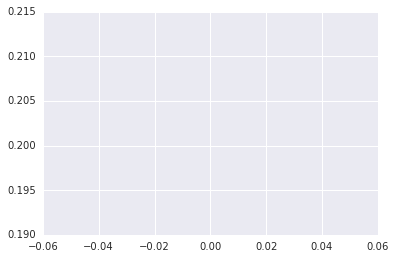

In [17]:
parameter=np.arange(0.1,5,10)
parameter2=np.arange(0.1,4,10)
results=np.ndarray(shape=(len(parameter),len(parameter2)))
for i in range(len(parameter)):
    for j in range(len(parameter2)):
        results[i,j]=Modelvalidation(SVR(C=parameter[i], epsilon=parameter2[j]),x,y).mean()
plt.plot(results)    
print(results.min())

# Ensemble the best regression with best tree

Estimating a good mixture parameter

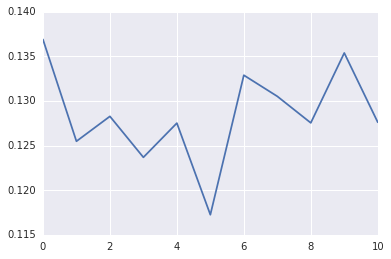

In [18]:
model1=GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber')
#model2=linear_model.Ridge(alpha=30)
model2=linear_model.BayesianRidge()

parameter=np.arange(0,1.1,0.1)
result=np.zeros(len(parameter))
for i in range(len(parameter)):
    result[i]=Two_Modelvalidation(model1,model2,x,y,takelog=True,model1imp=parameter[i]).mean()
plt.plot(result)

Actual modelvalidation

0.127016676622


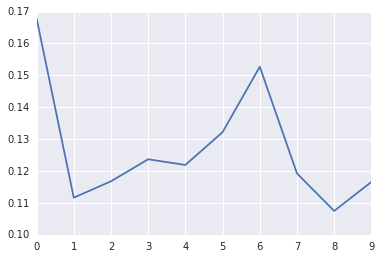

In [22]:
model1=GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber')
model2=linear_model.Ridge(alpha=30)

result=Two_Modelvalidation(model1,model2,x,y,takelog=True)
plt.plot(result)   
print(result.mean())

# Final prediction

In [20]:
model1_fit=model1.fit(x,np.log(y))
model2_fit=model2.fit(x,np.log(y))
prediction_model1=np.exp(model1_fit.predict(final_set))
prediction_model2=np.exp(model2_fit.predict(final_set))
prediction=(prediction_model1+prediction_model2)/2

In [21]:
prediction=pd.concat([test['Id'],pd.DataFrame(prediction)],axis=1)
prediction.columns=["Id","SalePrice"]
prediction.to_csv('submission.csv',index=False)